<a href="https://colab.research.google.com/github/Forkyknight/Face_recognition/blob/master/face_recognition_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-DHqphvYh7Ktwy4N6EDPlQddJJVDdkNc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-DHqphvYh7Ktwy4N6EDPlQddJJVDdkNc" -O "export.pkl" && rm -rf /tmp/cookies.txt

--2020-08-29 17:24:14--  https://docs.google.com/uc?export=download&confirm=2aMX&id=1-DHqphvYh7Ktwy4N6EDPlQddJJVDdkNc
Resolving docs.google.com (docs.google.com)... 108.177.97.113, 108.177.97.101, 108.177.97.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-b8-docs.googleusercontent.com/docs/securesc/hm8369guacc59cm19e0lanqa2gqigm2d/i9mniklrdhjgm50iqbu3a3k7le2intco/1598721825000/17368260815928528452/02795165703627390231Z/1-DHqphvYh7Ktwy4N6EDPlQddJJVDdkNc?e=download [following]
--2020-08-29 17:24:15--  https://doc-00-b8-docs.googleusercontent.com/docs/securesc/hm8369guacc59cm19e0lanqa2gqigm2d/i9mniklrdhjgm50iqbu3a3k7le2intco/1598721825000/17368260815928528452/02795165703627390231Z/1-DHqphvYh7Ktwy4N6EDPlQddJJVDdkNc?e=download
Resolving doc-00-b8-docs.googleusercontent.com (doc-00-b8-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import sys
from PIL import Image as IM
from google.colab.patches import cv2_imshow
from IPython.display import HTML
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
my_dir=""

In [ ]:
predictor = load_learner(my_dir)

In [ ]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

In [ ]:
 def cord_face(imagePath):
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

    status = cv2.imwrite(imagePath, image)
   
    extract_face(faces,imagePath)
    return (faces,imagePath)
    

In [ ]:
!mkdir frames extract

In [ ]:
def extract_face(faces,imagePath):
  j=0
  image = cv2.imread(imagePath)
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w] 
    gray = cv2.cvtColor(roi_color, cv2.COLOR_BGR2GRAY)
    I=IM.fromarray(gray)
    I.save("/content/extract/"+str(j)+".jpg")
    j=j+1


In [ ]:
def final(faces,imagePath):
  k=0;
  for (x,y,w,h) in faces:
    img=cv2.imread(imagePath)
    img1=cv2.imread("extract/"+str(k)+".jpg")
    cv2.imwrite("temp.jpg",img1)
    ans_text=my_predictor("temp.jpg")
    font = cv2.FONT_HERSHEY_SIMPLEX 
    #font = cv2.PACIFICO
    org = (x,y) 
    fontScale = 0.6
    color = (255, 160, 0) 
    thickness = 2
    img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
    cv2.imwrite(imagePath, img)
    
    k=k+1

In [ ]:
def input_img(path):
  (faces,imagePath)=cord_face(path)
  final(faces,imagePath)
  img = cv2.imread(imagePath)
  cv2_imshow(img)
  !rm /content/extract/*".jpg"

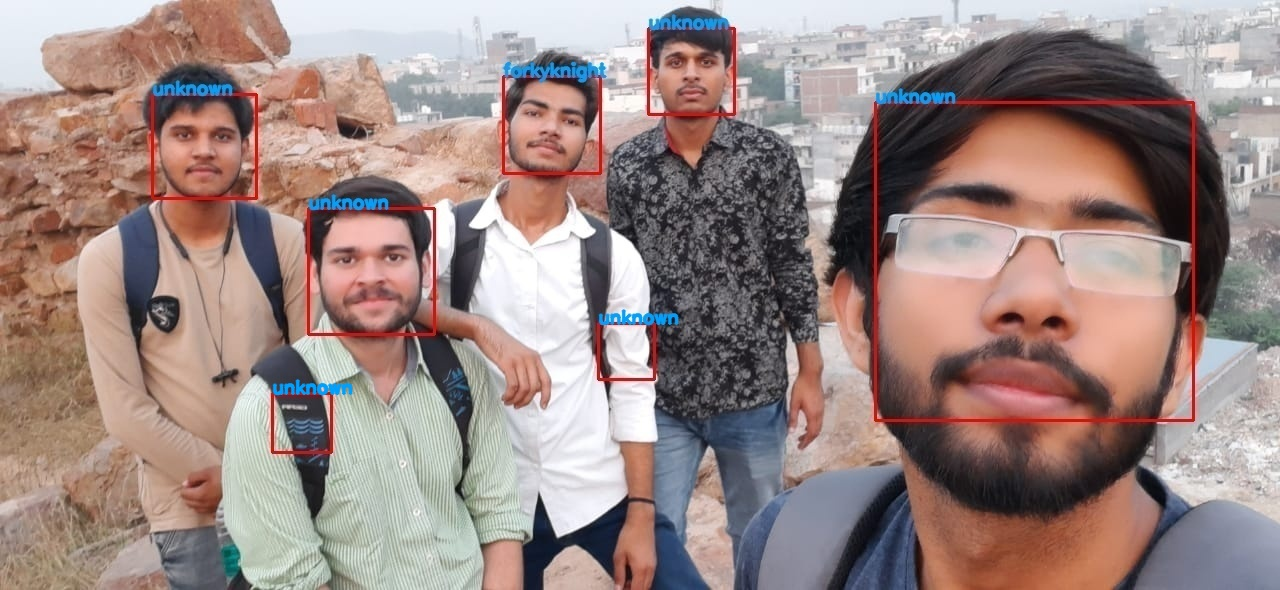

In [ ]:
input_img("1.jpg")

In [ ]:
input_img("2.jpg")